In [ ]:
###https://anaconda.org/gwinnen/finance-project-solutions/notebook
##here this project is avaliable

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
bank_stocks = pd.read_pickle('all_banks')

In [8]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [9]:
ticker = ['BAC','C','GS','JPM','MS','WFC']

In [10]:
ticker

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [12]:
bank_stocks['C']['Close'].head()

Date
2006-01-03    492.9
2006-01-04    483.8
2006-01-05    486.2
2006-01-06    486.2
2006-01-09    483.9
Name: Close, dtype: float64

In [13]:
bank_stocks['C']['Close'].min()

4.52

In [14]:
for t in ticker :
    print(t+":",bank_stocks[t]['Close'].min())

BAC: 3.14
C: 4.52
GS: 52.0
JPM: 15.9
MS: 9.2
WFC: 8.12


In [16]:
#cross secetion
bank_stocks.xs(key='Close',axis=1,level='Stock Info').min()

Bank Ticker
BAC     3.14
C       4.52
GS     52.00
JPM    15.90
MS      9.20
WFC     8.12
dtype: float64

In [17]:
#calculate percent change
returns =pd.DataFrame()

   

In [18]:
for t in ticker :
    returns[t+"Return"]=bank_stocks[t]['Close'].pct_change()

In [19]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


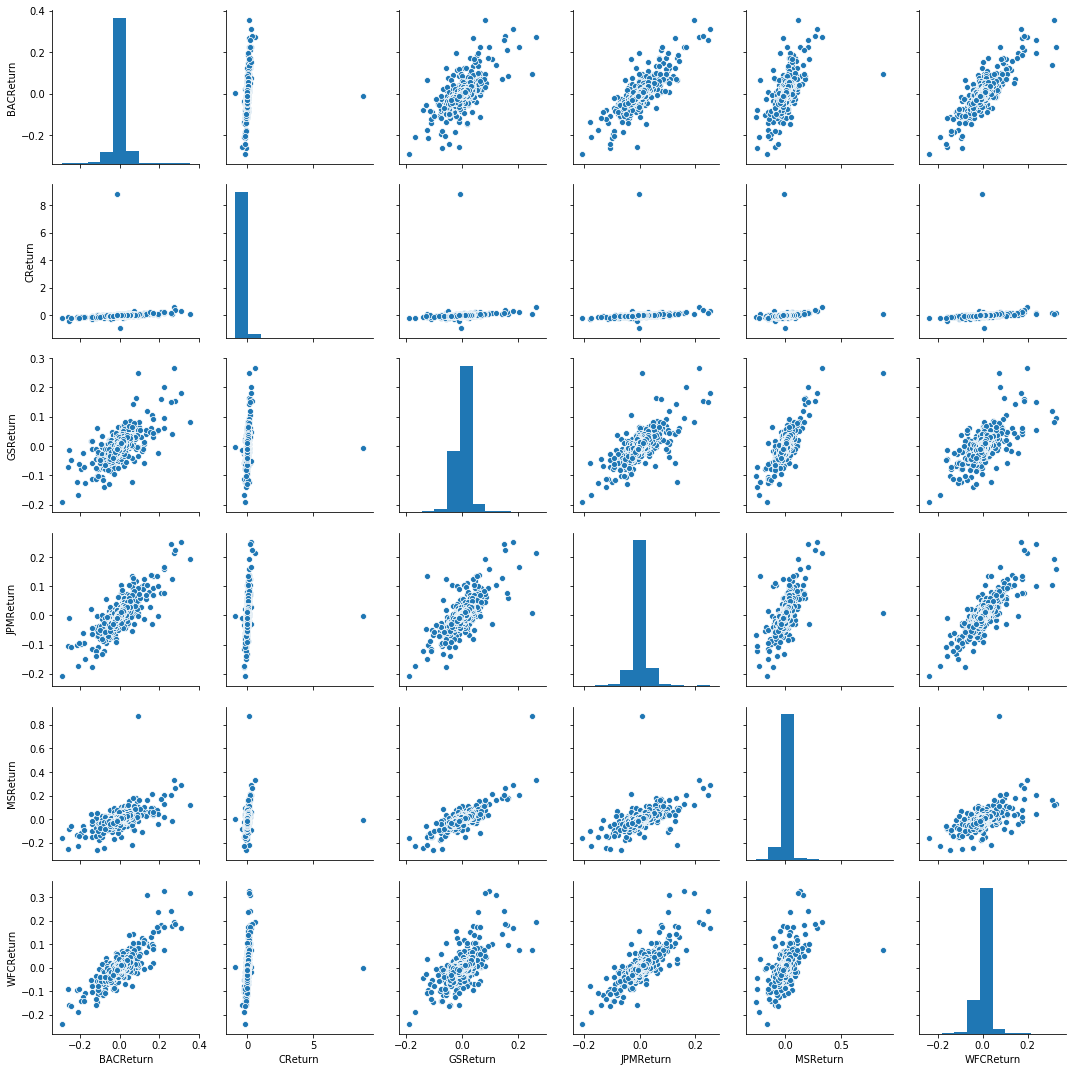

In [22]:
sns.pairplot(returns)

In [83]:
returns.loc[returns.idxmin()[0]]
#idxmean(bank_stocks)

BACReturn   -0.289694
CReturn     -0.200000
GSReturn    -0.189596
JPMReturn   -0.207274
MSReturn    -0.159718
WFCReturn   -0.238223
Name: 2009-01-20 00:00:00, dtype: float64

In [25]:
 returns.idxmin()

BACReturn   2009-01-20
CReturn     2011-05-06
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [26]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2011-05-09
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [34]:
returns.corr()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
BACReturn,1.000000,0.166715,0.685786,0.815507,0.643946,0.828295
CReturn,0.166715,1.000000,0.138584,0.157383,0.132564,0.152578
GSReturn,0.685786,0.138584,1.000000,0.738803,0.805125,0.662836
JPMReturn,0.815507,0.157383,0.738803,1.000000,0.646354,0.826337
MSReturn,0.643946,0.132564,0.805125,0.646354,1.000000,0.598627
WFCReturn,0.828295,0.152578,0.662836,0.826337,0.598627,1.000000


In [35]:
returns.std()

BACReturn    0.036650
CReturn      0.179969
GSReturn     0.025346
JPMReturn    0.027656
MSReturn     0.037820
WFCReturn    0.030233
dtype: float64

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


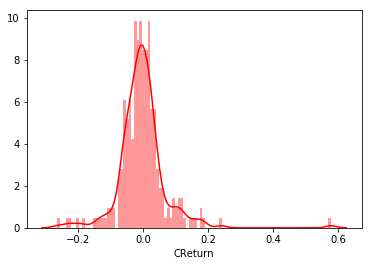

In [41]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],color='red',bins=100)

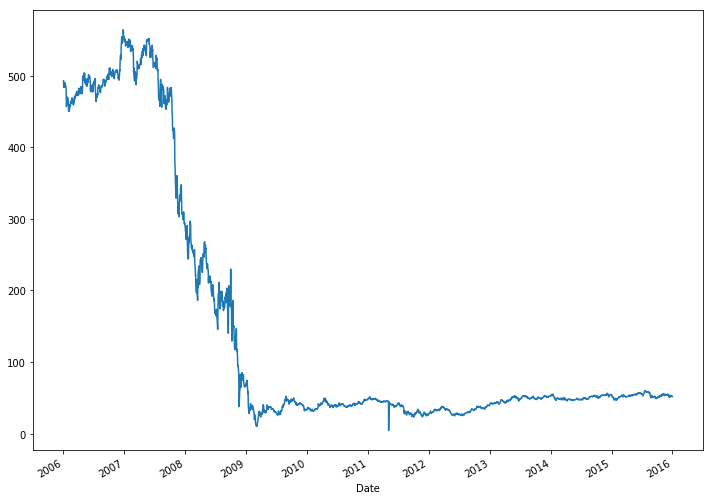

In [45]:
bank_stocks['C']['Close'].plot(figsize=(12,9))

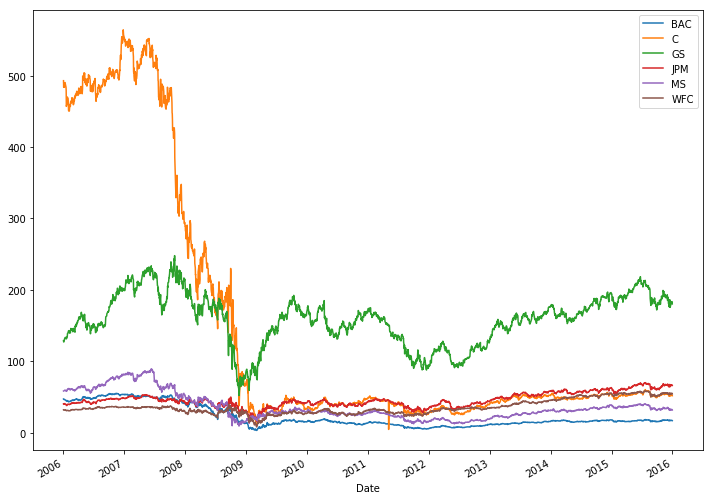

In [50]:
for t in ticker:
    bank_stocks[t]['Close'].plot(figsize=(12,9),label=t)
    plt.legend()

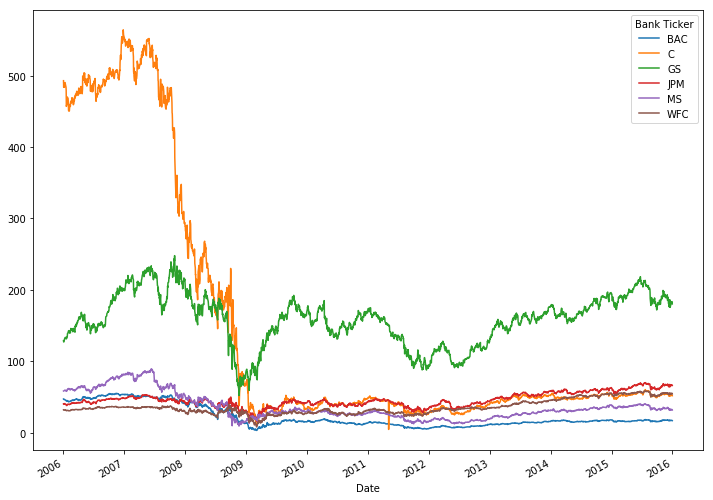

In [79]:
bank_stocks.xs(key='Close',axis=1,level="Stock Info").plot(figsize=(12,9),label=t)
#plt.legends()

In [58]:
import cufflinks as cf
#import ploty as 

In [71]:
##double colon
cf.__version__
import plotly

In [72]:
cf.go_offline()

In [75]:
bank_stocks.xs(key='Close',axis=1,level="Stock Info").iplot(kind='line')